# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**
1) We import the model1 from HouseholdSpecializationModelClass()
2) We create lists of alpha and sigma values 
3) We create an empty list for relative_hours worked
4) We solve the model for different combinations of alpha and sigmas by calling the solve_discrete def in ModelClass
5) We determine relative hours worked in the home by dividing optimal hours for females by optimal hours for males
6) We put relative hours into the empty list.
7) We put relative hours into a dataframe and make it into a latex table

In [ ]:
from inauguralproject import HouseholdSpecializationModelClass
model1 = HouseholdSpecializationModelClass()
par = model1.par
sol = model1.sol

In [ ]:
# Run loop for different combinations of sigma and alpha
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5,1.0,1.5]
relative_hours_1 = {}

for sigma in sigma_list:
    par.sigma = sigma
    for alpha in alpha_list:
        par.alpha = alpha
        opt = model1.solve_discrete()
        
        relative_hours_1[sigma,alpha] = opt.HF/opt.HM

In [ ]:
df = pd.DataFrame(list(relative_hours_1.items()), columns=['(sigma,alpha)', 'Relative hours'])
df[['sigma', 'alpha']] = pd.DataFrame(df['(sigma,alpha)'].tolist(), index=df.index)
df.drop('(sigma,alpha)', axis=1, inplace=True)
df = df.reindex(columns=['sigma', 'alpha', 'Relative hours'])

print(df.to_latex(index=False))

# Question 2

# Explain your code and procedure
1) We import the model2 from HouseholdSpecializationModelClass()
2) We create a list of wages 
3) We create an empty list for relative_hours and log_relative_hours worked
4) We solve the model for different values of female wages by calling the solve_discrete def in ModelClass
5) We determine relative hours worked in the home by dividing optimal hours for females by optimal hours for males. Afterwards, we take the log
6) We put relative hours into the empty list.
7) We put relative hours into a dataframe and make it into a latex table
8) We make a figure

In [ ]:
from inauguralproject import HouseholdSpecializationModelClass
model2 = HouseholdSpecializationModelClass()
par = model2.par
sol = model2.sol

In [ ]:
# Run loop for different combinations of sigma and alpha
relative_hours_2 = {}
log_relative_hours_2 = {}

for wF in par.wF_vec:
    model2.par.wF = wF
    opt = model2.solve_discrete()

    relative_hours_2[wF] = opt.HF/opt.HM
    log_relative_hours_2[wF]  = np.log(relative_hours_2[wF])

relative_hours_2_v = list(relative_hours_2.values())
log_relative_hours_2_v = list(log_relative_hours_2.values())
hours_wages_2 = list(zip(par.wF_vec,relative_hours_2_v,log_relative_hours_2_v))

In [ ]:
df2 = pd.DataFrame(hours_wages_2, columns=['Female wages','Relative hours','Log relative hours'])
print(df2.to_latex(index=False))

In [ ]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), log_relative_hours_2_v , color='red', lw=2)
ax.scatter(np.log(par.wF_vec), log_relative_hours_2_v)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.show()

# Question 3

Explain your code and procedure

In [4]:
from inauguralproject import HouseholdSpecializationModelClass
model3 = HouseholdSpecializationModelClass()
par = model3.par
sol = model3.sol

In [5]:
#solve via loop 
relative_hours_3 = {}
log_relative_hours_3 = {}

#Code solves the continuous model for different relativ wages
for wF in par.wF_vec:
    par.wF = wF
    opt = model3.solve()
        
    relative_hours_3[wF] = opt.HF/opt.HM
    log_relative_hours_3[wF] = np.log(relative_hours_3[wF])

relative_hours_3_v = list(relative_hours_3.values())
log_relative_hours_3_v = list(log_relative_hours_3.values())
hours_wages_3 = list(zip(par.wF_vec,relative_hours_3_v,log_relative_hours_3_v))

df3 = pd.DataFrame(hours_wages_3, columns=['Female wages','Relative hours','Log relative hours'])
print(df3.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 Female wages &  Relative hours &  Log relative hours \\
\midrule
          0.8 &        1.250012 &            0.223153 \\
          0.9 &        1.111120 &            0.105368 \\
          1.0 &        1.000006 &            0.000006 \\
          1.1 &        0.909092 &           -0.095309 \\
          1.2 &        0.833345 &           -0.182307 \\
\bottomrule
\end{tabular}



/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/var/folders/fj/trr23jhx25j8_78nf00613400000gn/T/ipykernel_82820/238670145.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df3.to_latex(index=False))


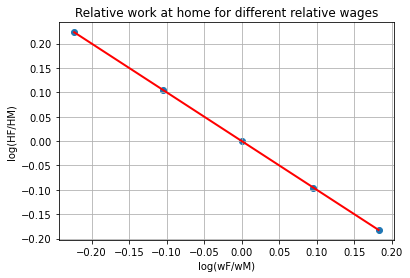

In [7]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), log_relative_hours_3_v, color='red', lw=2)
ax.scatter(np.log(par.wF_vec),log_relative_hours_3_v)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.show()

# Question 4

In [62]:
model4 = HouseholdSpecializationModelClass()
par = model4.par
sol = model4.sol

In [ ]:
alpha_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
sigma_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50]
distance = {}

for sigma in sigma_list:
    for alpha in alpha_list:
        dist = model4.estimate(alpha=alpha,sigma=sigma)
        
        distance[sigma,alpha] = dist

In [ ]:
min_dist = float('inf')
min_alpha = None
min_sigma = None

for key, value in distance.items():
    if value < min_dist:
        min_dist = value
        min_alpha = key[1]
        min_sigma = key[0]

print(f"The minimum distance is {min_dist} for alpha={min_alpha} and sigma={min_sigma}")

In [ ]:
distance

In [31]:
model4.estimate(0.9,0.15)

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


0.0074578136880497446

In [ ]:
options = {'maxfev': 10000}
obj = lambda x: -model4.estimate(alpha,sigma)
bounds = ((0.88,0.92), (0.13,0.17))
initial_guess = [0.9,0.15]
solution = optimize.minimize(obj, initial_guess, method="nelder-mead", bounds=bounds, options=options)

In [18]:
model41 = HouseholdSpecializationModelClass()
par = model41.par
sol = model41.sol

In [19]:
model41.par.sigma = 0.15
model41.par.alpha = 0.9
model41.solve_wF_vec()
log_relative_hours_41 = np.log(sol.HF_vec/sol.HM_vec)

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


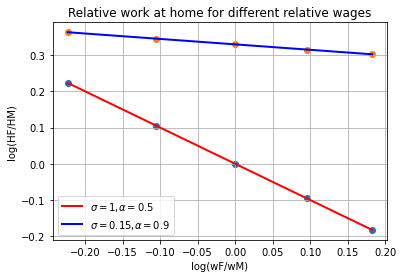

In [23]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), log_relative_hours_3_v, color='red', lw=2, label=fr"$\sigma=1$,$\alpha=0.5$")
ax.scatter(np.log(par.wF_vec),log_relative_hours_3_v)

ax.plot(np.log(par.wF_vec), log_relative_hours_41, color='blue', lw=2, label=fr"$\sigma=0.15$,$\alpha=0.9$")
ax.scatter(np.log(par.wF_vec),log_relative_hours_41)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
ax.legend()
plt.show()

# Question 5


In [48]:
model5 = HouseholdSpecializationModelClass()
par = model5.par
sol = model5.sol
model5.par.theta = 1.5

In [63]:
theta_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
distance = {}

for theta in theta_list:
    dist = model5.estimate(alpha=0.5,sigma=1,theta=theta)
        
    distance[theta] = dist

In [64]:
min_dist = float('inf')
min_theta = None

for key, value in distance.items():
    if value < min_dist:
        min_dist = value
        min_theta = key

print(f"The minimum distance is {min_dist} for theta={min_theta}")

The minimum distance is 0.5962533670263043 for theta=0.4
